### MATH 3375 Project 5 - Classification Methods

For this project, we will use a data set with fully anonymous data from credit card applications, with a binary response variable (last column) indicating if the application was positive (1) or negative (0). Positive means credit was granted to the applicant. 

The data set is a subset of rows and columns in the _Credit Approval_ dataset from the Machine Learning Repository at UC Irvine. Specifically, non-binary categorical features (columns) have been removed, and rows with missing data have been removed. The ten predictors include 4 binary features and 6 quantitative features. Feature names and descriptions have been masked to protect confidentiality. 

Below is documentation related to the data set. 

    Title: Credit Approval

    Past Usage:

    See Quinlan,
    * "Simplifying decision trees", Int J Man-Machine Studies 27,
      Dec 1987, pp. 221-234.
    * "C4.5: Programs for Machine Learning", Morgan Kaufmann, Oct 1992
  
    Relevant Information:
    This file concerns credit card applications.  All attribute names
    and values have been changed to meaningless symbols to protect
    confidentiality of the data.

    Attribute Information:

        A1: binary
        A2: continuous
        A3: continuous
        A8: continuous
        A9: binary
        A10: binary
        A11: continuous
        A12: binary
        A14: continuous
        A15: continuous
        R1:  binary (response variable - classification)


In [1]:
credit_data <- read.delim("credit_app_data.txt",header=TRUE,sep="\t")
head(credit_data)

,A1,A2,A3,A8,A9,A10,A11,A12,A14,A15,R1
,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,30.83,0.000,1.25,1,0,1,1,202,0,1
2,0,58.67,4.460,3.04,1,0,6,1,43,560,1
3,0,24.50,0.500,1.50,1,1,0,1,280,824,1
4,1,27.83,1.540,3.75,1,0,5,0,100,3,1
5,1,20.17,5.625,1.71,1,1,0,1,120,0,1
6,1,32.08,4.000,2.50,1,1,0,0,360,0,1


## Tasks

### Exploratory Data Analysis

#### 1. Identify Predictors for a 2-Dimensional Model

Use appropriate plots to identify TWO features in the data set that you think have the best potential as predictors in kNN and SVM models. (Note that this means your two predicting dimensions should separate the positive and negative data points effectively.

    

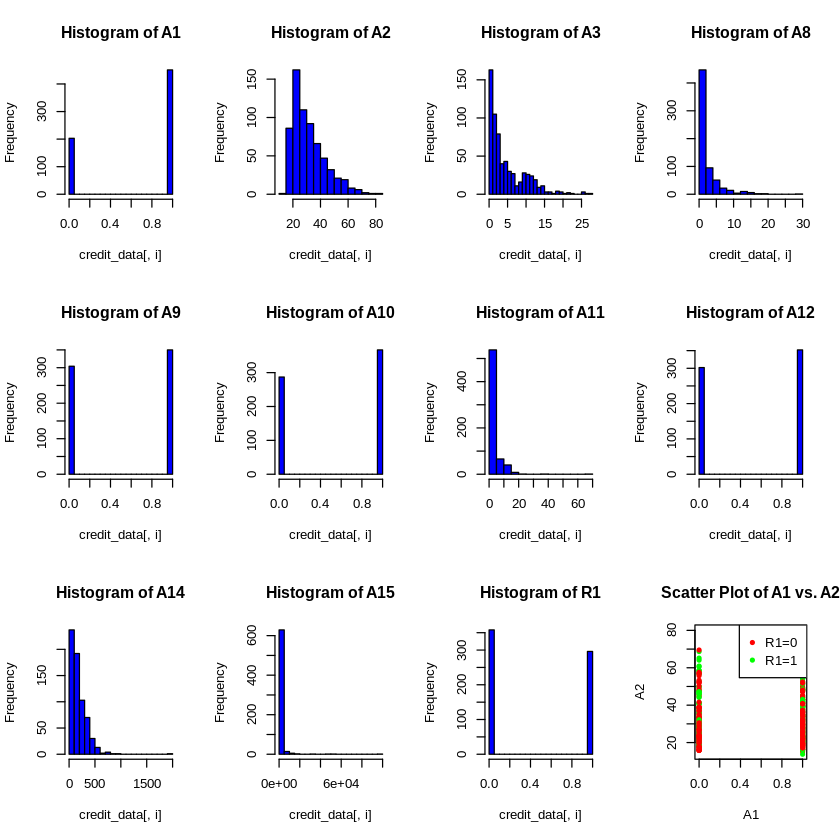

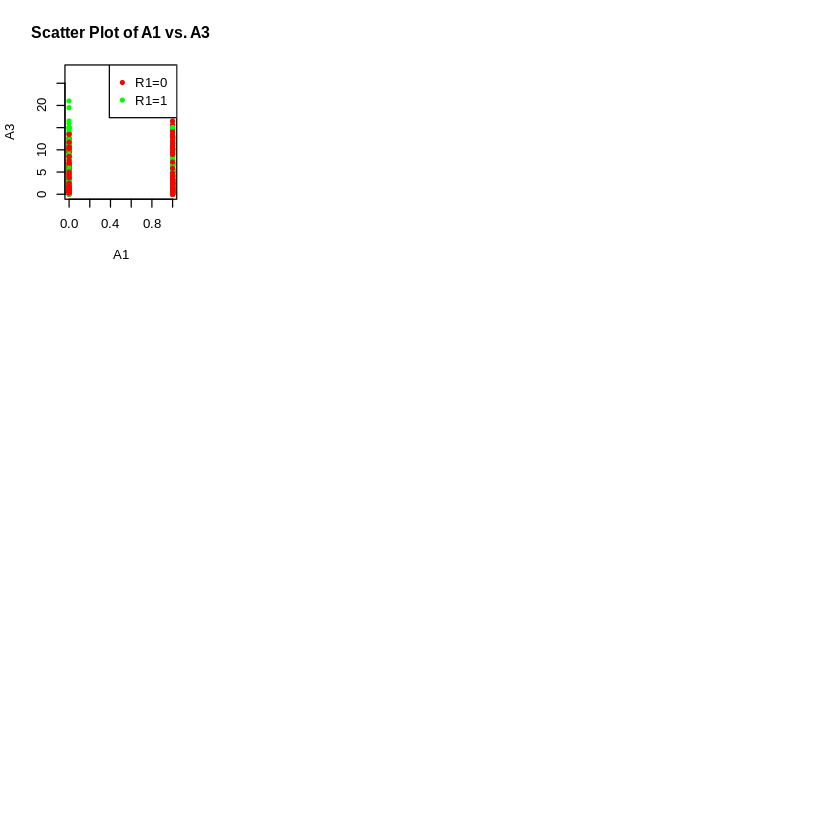

In [2]:
par(mfrow=c(3,4))
for (i in 1:11) {
hist(credit_data[, i], main=paste("Histogram of", names(credit_data)[i]), col="blue", breaks=20)
}

plot(credit_data$A1, credit_data$A2, col=ifelse(credit_data$R1 == 0, "red", "green"), 
     pch=20, main="Scatter Plot of A1 vs. A2", xlab="A1", ylab="A2")
legend("topright", legend=c("R1=0", "R1=1"), col=c("red", "green"), pch=20)


plot(credit_data$A1, credit_data$A3, col=ifelse(credit_data$R1 == 0, "red", "green"), 
      pch=20, main="Scatter Plot of A1 vs. A3", xlab="A1", ylab="A3")
 legend("topright", legend=c("R1=0", "R1=1"), col=c("red", "green"), pch=20)



#### 2. Visualize Data Points 

Using your 2 selected predictors as horizontal and vertical dimensions, plot your data points, identifying the response variable (R1) with _**color-coding and/or different markers**_. Include a legend on the plot that identifies which points represent 'Credit Granted' (positive) and 'Credit Not Granted' (negative).

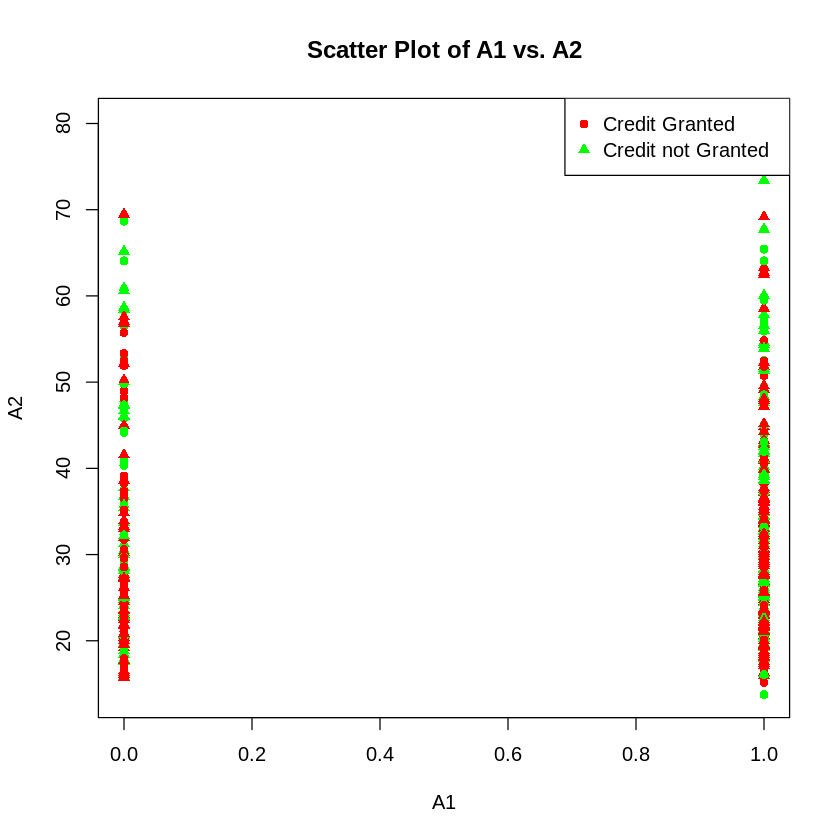

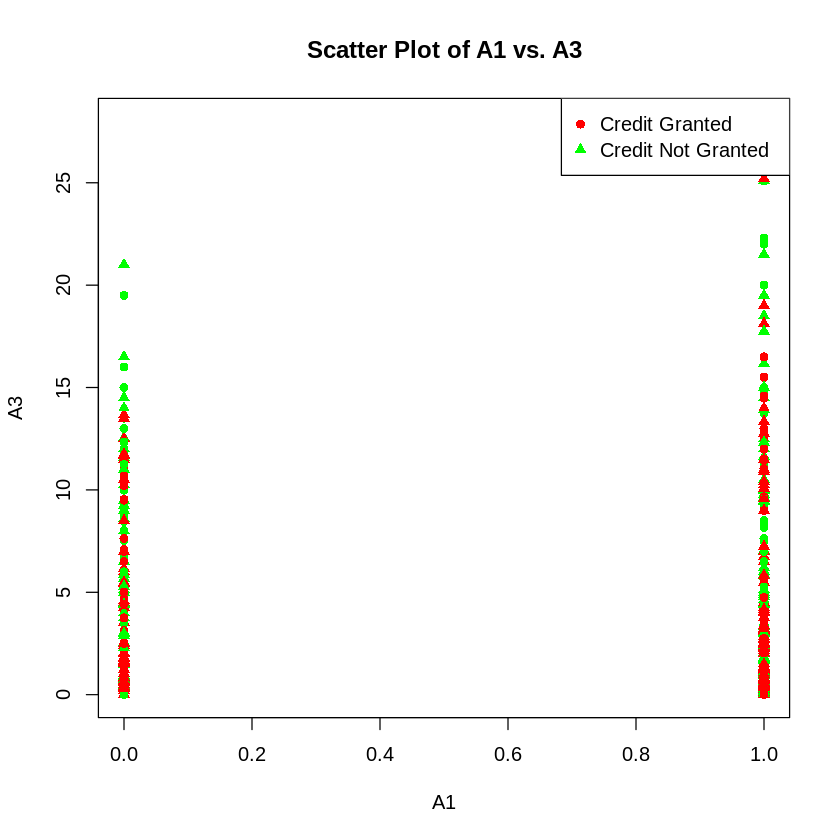

In [3]:
#Put code for Exercise 2 in this cell. You may add additional cells if you like.
shapes = c(16,17)

plot(credit_data$A1, credit_data$A2, col=ifelse(credit_data$R1 == 0, "red", "green"), 
     pch=shapes, main="Scatter Plot of A1 vs. A2", xlab="A1", ylab="A2")
legend("topright", legend=c("Credit Granted", "Credit not Granted"), col=c("red", "green"), pch=shapes)


plot(credit_data$A1, credit_data$A3, col=ifelse(credit_data$R1 == 0, "red", "green"), 
      pch=shapes, main="Scatter Plot of A1 vs. A3", xlab="A1", ylab="A3")
 legend("topright", legend=c("Credit Granted", "Credit Not Granted"), col=c("red", "green"), pch=shapes)



### Partitioning Data

#### 3. Partition the data set into training and test sets.

Partition the data set into a training set (80% of the data) and a test set (20% of the data).  Note that you should train your model(s) _**using ONLY the training data**.  We are saving the test data set to evaluate performance of the models._

In [4]:
#Put solution to Exercise 3 in this cell. You may add additional cells if you like.
set.seed(3375)

head(credit_data)

train_rows <- sample(1:nrow(credit_data),523.2)
credit_train <- credit_data[train_rows,]
credit_test <- credit_data[-train_rows,]

,A1,A2,A3,A8,A9,A10,A11,A12,A14,A15,R1
,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,30.83,0.000,1.25,1,0,1,1,202,0,1
2,0,58.67,4.460,3.04,1,0,6,1,43,560,1
3,0,24.50,0.500,1.50,1,1,0,1,280,824,1
4,1,27.83,1.540,3.75,1,0,5,0,100,3,1
5,1,20.17,5.625,1.71,1,1,0,1,120,0,1
6,1,32.08,4.000,2.50,1,1,0,0,360,0,1


### Create 2-Dimensional Models

#### 4. Create k-Nearest Neighbors (kNN) Classifiers 

Using ONLY the 2 predictors that you selected in Task 1, create k-Nearest Neighbors models (from training set only) with at LEAST three different values of k. Use each model to predict the response variable for the data in the test set.  Use appropriate metrics (e.g., accuracy, sensitivity, specificity, confusion matrix, ROC curve with AUC) to decide which value of k has the best performance.

In [5]:
#install.packages("class")
library(class)

In [6]:
#Put solution to Exercise 4 in this cell. You may add additional cells if you like.

credit_knn3_a <- knn(credit_train[,2:3], credit_test[,2:3], cl=credit_train[,11], k = 3)
head(data.frame(credit_knn3_a,credit_test$R1))

credit_knn5_a <- knn(credit_train[,2:3], credit_test[,2:3], cl=credit_train[,11], k = 5)
head(data.frame(credit_knn5_a,credit_test$R1))

credit_knn7_a <- knn(credit_train[,2:3], credit_test[,2:3], cl=credit_train[,11], k = 7)
head(data.frame(credit_knn7_a,credit_test$R1))

# Function to calculate accuracy and sensitivity
evaluate_knn_metrics <- function(predictions, actual) {
  conf_matrix <- table(Actual = actual, Predicted = predictions)
  accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)
  TP <- conf_matrix[2, 2]
  FN <- conf_matrix[2, 1]
  sensitivity <- TP / (TP + FN)
  return(list(accuracy = accuracy, sensitivity = sensitivity))
}

# Calculate metrics for kNN with k=3
knn_metrics_3 <- evaluate_knn_metrics(credit_knn3_a, credit_test$R1)

# Calculate metrics for kNN with k=5
knn_metrics_5 <- evaluate_knn_metrics(credit_knn5_a, credit_test$R1)

# Calculate metrics for kNN with k=7
knn_metrics_7 <- evaluate_knn_metrics(credit_knn7_a, credit_test$R1)

# Print kNN metrics
knn_metrics_3
knn_metrics_5
knn_metrics_7


,credit_knn3_a,credit_test.R1
,<fct>,<int>
1,1,1
2,1,1
3,0,1
4,0,1
5,0,1
6,1,1


,credit_knn5_a,credit_test.R1
,<fct>,<int>
1,0,1
2,1,1
3,0,1
4,0,1
5,0,1
6,1,1


,credit_knn7_a,credit_test.R1
,<fct>,<int>
1,0,1
2,1,1
3,0,1
4,0,1
5,0,1
6,1,1


$accuracy
[1] 0.6183206

$sensitivity
[1] 0.58

$accuracy
[1] 0.6412214

$sensitivity
[1] 0.58

$accuracy
[1] 0.6030534

$sensitivity
[1] 0.56

#### 4a. Report Your Results

Report the metrics you used to compare your models (give the name AND value of the metric for each model). Identify which value of k gave the best predictions for this data set.

where k = 5 gives the best prediction

#### 5. Create Support Vector Machine (SVM) Classifiers

Again, using only the same 2 predictors as above, create 2 SVM classifiers: One should use a linear kernel and the other should use a radial kernel. Show a plot of the decision boundary for each model.  Again, use each model to predict the response variable for the test data set, and use appropriate metrics to compare the two models.

In [9]:
#Put solution to Exercise 5 in this cell. You may add additional cells if you like.
#install.packages("e1071")
library(e1071)
#ask about if it should be train set, test set, or whole data set
# Define predictors and response variable
predictors <- credit_train[, c("A2", "A3")]
response <- as.factor(ifelse(credit_train$R1 == 1,1,0))

svm_model <- svm(response ~ ., data = data.frame(predictors, response), kernel = "linear")
summary(svm_model)

support_vectors <- as.data.frame(predictors[svm_model$index, ])
num_support_vectors <- nrow(support_vectors)


predicted_values <- predict(svm_model, data.frame(predictors))


conf_matrix <- table(Actual = response, Predicted = predicted_values)
conf_matrix

accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)


TP <- conf_matrix[2, 2]
FN <- conf_matrix[2, 1]


sensitivity <- TP / (TP + FN)
accuracy
sensitivity


Call:
svm(formula = response ~ ., data = data.frame(predictors, response), 
    kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 

Number of Support Vectors:  437

 ( 219 218 )


Number of Classes:  2 

Levels: 
 0 1




      Predicted
Actual   0   1
     0 225  52
     1 151  95

[1] 0.6118547

[1] 0.3861789

In [17]:
subset_2d = data.frame(credit_data[,c(2,3)], y = as.factor(credit_data$R1))
model_svm_tran01 = svm(y ~ ., data = subset_2d, kernel = "linear")
summary(model_svm_tran01)

model_svm_tran02 = svm(y ~ ., data = subset_2d, kernel = "radial")
summary(model_svm_tran02)


predictored <- credit_train[, c("A2", "A3")]
responsess <- as.factor(ifelse(credit_train$R1 == 1,1,0))
predicted_valuesss <- predict(model_svm_tran02, data.frame(predictored))

conf_matrixs <- table(Actual = responsess, Predicted = predicted_valuesss)
conf_matrixs

accuracys <- sum(diag(conf_matrixs)) / sum(conf_matrixs)


TPt <- conf_matrixs[2, 2]
FNf <- conf_matrixs[2, 1]


sensitivityyy <- TPt / (TPt + FNf)
accuracys
sensitivityyy


Call:
svm(formula = y ~ ., data = subset_2d, kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 

Number of Support Vectors:  548

 ( 274 274 )


Number of Classes:  2 

Levels: 
 0 1





Call:
svm(formula = y ~ ., data = subset_2d, kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  528

 ( 264 264 )


Number of Classes:  2 

Levels: 
 0 1




      Predicted
Actual   0   1
     0 230  47
     1 148  98

[1] 0.6271511

[1] 0.398374

#### 5a. Report Your Results

Report the metrics you used to compare the models. Identify which kernel gave the best predictions.

 the SVM model with a radial kernel appears to perform slightly better than the model with a linear kernel in terms of accuracy and sensitivity. The SVM model with a radial kernel has a higher accuracy of approximately 62.72% compared to 61.19% for the linear kernel. The sensitivity of the radial kernel model is also slightly higher at approximately 39.84% compared to 38.62% for the linear kernel.

### Create Higher Dimension Models

#### 6. Create a kNN Classifier 

Repeat Task 4 using ALL available features in the data set as predictors.


In [11]:
#Put solution to Exercise 6 in this cell. You may add additional cells if you like.
credit_knn3 <- knn(credit_train[,1:10], credit_test[,1:10], cl=credit_train[,11], k = 3)
head(data.frame(credit_knn3,credit_test$R1))

credit_knn5 <- knn(credit_train[,1:10], credit_test[,1:10], cl=credit_train[,11], k = 5)
head(data.frame(credit_knn5,credit_test$R1))

credit_knn7 <- knn(credit_train[,1:10], credit_test[,1:10], cl=credit_train[,11], k = 7)
head(data.frame(credit_knn7,credit_test$R1))

# Function to calculate accuracy and sensitivity
evaluate_knn_metrics <- function(predictions, actual) {
  conf_matrix <- table(Actual = actual, Predicted = predictions)
  accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)
  TP <- conf_matrix[2, 2]
  FN <- conf_matrix[2, 1]
  sensitivity <- TP / (TP + FN)
  return(list(accuracy = accuracy, sensitivity = sensitivity))
}

# Calculate metrics for kNN with k=3
knn_metrics_3a <- evaluate_knn_metrics(credit_knn3, credit_test$R1)

# Calculate metrics for kNN with k=5
knn_metrics_5a <- evaluate_knn_metrics(credit_knn5, credit_test$R1)

# Calculate metrics for kNN with k=7
knn_metrics_7a <- evaluate_knn_metrics(credit_knn7, credit_test$R1)

# Print kNN metrics
knn_metrics_3a
knn_metrics_5a
knn_metrics_7a

,credit_knn3,credit_test.R1
,<fct>,<int>
1,1,1
2,1,1
3,1,1
4,1,1
5,0,1
6,1,1


,credit_knn5,credit_test.R1
,<fct>,<int>
1,1,1
2,1,1
3,1,1
4,0,1
5,0,1
6,1,1


,credit_knn7,credit_test.R1
,<fct>,<int>
1,1,1
2,1,1
3,1,1
4,0,1
5,0,1
6,1,1


$accuracy
[1] 0.6717557

$sensitivity
[1] 0.62

$accuracy
[1] 0.6717557

$sensitivity
[1] 0.54

$accuracy
[1] 0.6946565

$sensitivity
[1] 0.52

#### 6a. Report Your Results

These results indicate the performance of the kNN models with different values of k on the test dataset. Based on the metrics, the kNN model with k = 7 has the highest accuracy of approximately 69.47%, while the kNN model with k = 3 has the highest sensitivity of 62.00%. A higher k value (k = 7) can provide better accuracy, while a lower k value (k = 3) can provide better sensitivity. 

#### 7. Create an SVM Classifier

Repeat Task 5 using ALL available features in the data set as predictors.


In [12]:
#Put solution to Exercise 7 in this cell. You may add additional cells if you like.
pred <- credit_train[,1:10]
responses <- as.factor(ifelse(credit_train$R1 == 1,1,0))

svm_model2 <- svm(responses ~ ., data = data.frame(pred, responses), kernel = "linear")
summary(svm_model)

support_vector <- as.data.frame(pred[svm_model2$index, ])
num_support_vector <- nrow(support_vector)


predicted_value <- predict(svm_model2, data.frame(pred))


conf_matrix2 <- table(Actual = responses, Predicted = predicted_value)
conf_matrix2

accuracy2 <- sum(diag(conf_matrix2)) / sum(conf_matrix2)


TP2 <- conf_matrix[2, 2]
FN2 <- conf_matrix[2, 1]


sensitivity2 <- TP2 / (TP2 + FN2)
accuracy2
sensitivity2


Call:
svm(formula = response ~ ., data = data.frame(predictors, response), 
    kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 

Number of Support Vectors:  437

 ( 219 218 )


Number of Classes:  2 

Levels: 
 0 1




      Predicted
Actual   0   1
     0 227  50
     1  14 232

[1] 0.8776291

[1] 0.3861789

In [22]:
subset_2dd = data.frame(credit_data[,1:10], y = as.factor(credit_data$R1))
model_svm_tran03 = svm(y ~ ., data = subset_2dd, kernel = "linear")
summary(model_svm_tran03)

model_svm_tran04 = svm(y ~ ., data = subset_2dd, kernel = "radial")
summary(model_svm_tran04)

preds <- credit_train[,1:10]
responsees <- as.factor(ifelse(credit_train$R1 == 1,1,0))
predicted_valuesz <- predict(model_svm_tran04, data.frame(preds))


conf_matrixx <- table(Actual = responsess, Predicted = predicted_valuesz)
conf_matrixx 

accuracies <- sum(diag(conf_matrixx)) / sum(conf_matrixx)


TPpp <- conf_matrix[2, 2]
FNnn <- conf_matrix[2, 1]


sensitivities <- TPpp / (TPpp + FNnn)
accuracies
sensitivities


Call:
svm(formula = y ~ ., data = subset_2dd, kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 

Number of Support Vectors:  190

 ( 98 92 )


Number of Classes:  2 

Levels: 
 0 1





Call:
svm(formula = y ~ ., data = subset_2dd, kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  271

 ( 148 123 )


Number of Classes:  2 

Levels: 
 0 1




      Predicted
Actual   0   1
     0 232  45
     1  14 232

[1] 0.8871893

[1] 0.3861789

#### 7a. Report Your Results
Both models have similar sensitivity (True Positive Rate) of approximately 38.62%.
The SVM model with the radial kernel has a slightly higher accuracy of approximately 88.72%, while the SVM model with the linear kernel has an accuracy of approximately 87.76%. Based on these metrics, the SVM model with the radial kernel appears to perform slightly better in terms of accuracy, although the difference is not substantial. 

##### 8. Create a Decision Tree

Using all available features in the data set as predictors, create at least one decision tree. (You may also do more than one tree with different pruning or complexity parameters, but this is not required.) Show a plot of the tree(s) you create. Use the tree(s) to generate predictions for the test data set, and use appropriate metrics to measure how well the tree(s) predict the response variable.

In [14]:
#Put solution to Exercise 8 in this cell. You may add additional cells if you like.
#install.packages("rpart")
#install.packages("rpart.plot")
library(rpart)
library(rpart.plot)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



n= 654 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 654 296 0 (0.54740061 0.45259939)  
   2) A9< 0.5 304  18 0 (0.94078947 0.05921053) *
   3) A9>=0.5 350  72 1 (0.20571429 0.79428571)  
     6) A10>=0.5 127  51 1 (0.40157480 0.59842520)  
      12) A15< 450 106  50 1 (0.47169811 0.52830189)  
        24) A14>=111 69  29 0 (0.57971014 0.42028986)  
          48) A14< 212.5 28   7 0 (0.75000000 0.25000000) *
          49) A14>=212.5 41  19 1 (0.46341463 0.53658537)  
            98) A14>=396.5 12   3 0 (0.75000000 0.25000000) *
            99) A14< 396.5 29  10 1 (0.34482759 0.65517241) *
        25) A14< 111 37  10 1 (0.27027027 0.72972973)  
          50) A15>=10 8   2 0 (0.75000000 0.25000000) *
          51) A15< 10 29   4 1 (0.13793103 0.86206897) *
      13) A15>=450 21   1 1 (0.04761905 0.95238095) *
     7) A10< 0.5 223  21 1 (0.09417040 0.90582960) *


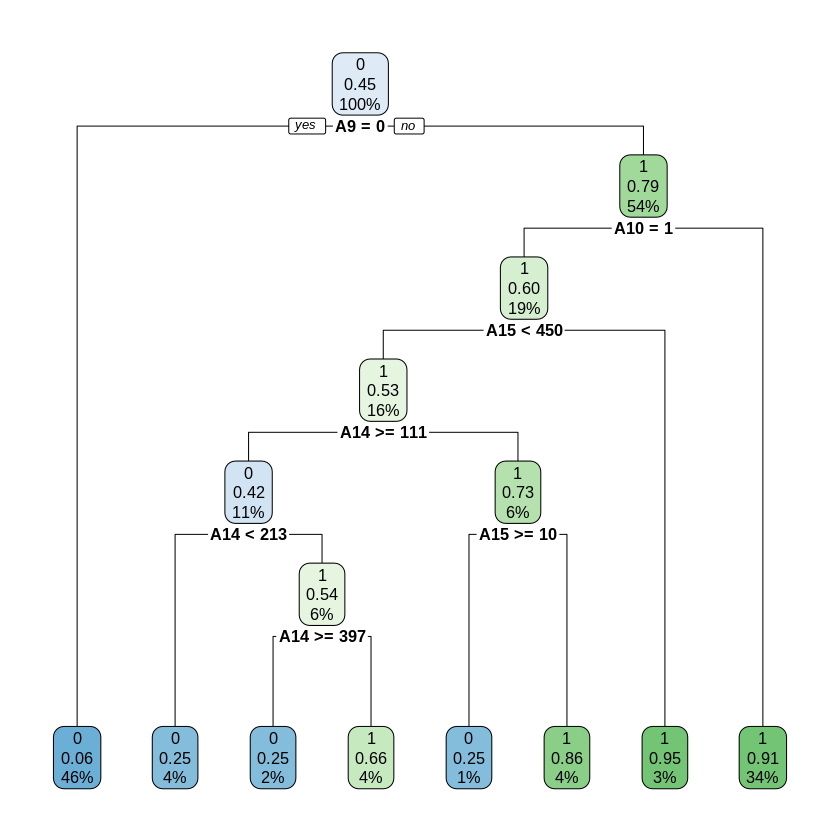

In [15]:
tran_model_tree <- rpart(R1~. ,data=credit_data, method="class")

print(tran_model_tree)

rpart.plot(tran_model_tree)

#### 8a. Compare Your 'Best' Models

Use metrics to compare your BEST model from each of the above classifier tasks (4, 5, 6, 7, and 8). Of these 5 models, which one has the best performance? You may use metrics you already computed above, or you may compute additional metrics below.

Identify your choice for best model; also explain on which metric your decision is based, and why you chose that metric.
    
The SVM model with the radial kernel achieved the highest accuracy (0.8872).
The k-Nearest Neighbors model with k=3 had the highest sensitivity (0.62).
The choice of the best model depends on your specific priorities:

If maximizing accuracy is the primary goal, the SVM with a radial kernel is the top performer.
If you prioritize correctly identifying positive cases (high sensitivity), then k-Nearest Neighbors with k=3 is the best choice if considering all variables in the dataset.


### BONUS TASK

This task is not required, but it is worth bonus points. 

Create a logistic regression model using any set of predictors you choose. Determine the threshold that gives you the best classification predictions. Compare this model to the others you discussed in Task 8 above, using the same metrics for comparison. 

How does the logistic regression model perform relative to the others?

In [ ]:
#Put solution to Bonus Task in this cell (NOT REQUIRED)
